# 第2章
## 2.2
### 2.2.1 初めてのHuggingFace Datasets

In [1]:
# from huggingface_hub import notebook_login

# notebook_login()

In [2]:
# from datasets import list_datasets

In [3]:
# all_datasets = list_datasets()

In [4]:
# len(all_datasets)

In [5]:
# all_datasets[:10]

In [6]:
from datasets import load_dataset

In [7]:
emotions = load_dataset('emotion')
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
for i, (text, label) in enumerate(zip(emotions['train']['text'], emotions['train']['label'])):
    if i > 10:
        break
    else:
        print(label, text)



0 i didnt feel humiliated
0 i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
3 im grabbing a minute to post i feel greedy wrong
2 i am ever feeling nostalgic about the fireplace i will know that it is still on the property
3 i am feeling grouchy
0 ive been feeling a little burdened lately wasnt sure why that was
5 ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
4 i feel as confused about life as a teenager or as jaded as a year old man
1 i have been with petronas for years i feel that petronas has performed well and made a huge profit
2 i feel romantic too
0 i feel like i have to make the suffering i m seeing mean something


In [9]:
emotions.keys()

dict_keys(['train', 'validation', 'test'])

In [10]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [11]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

### 2.2.1-番外 オリジナルのデータセットを読み込む

In [12]:
original_dataset = load_dataset('csv', data_files='./original_dataset2.csv', sep=',', names=['label', 'text'])
original_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 6
    })
})

In [13]:
original_dataset['train']['text']

['今日は家族で美味しい夕食を食べることができた',
 '行列ができるお店に昼食に行ったが、割り込まれてむかついた',
 '突然の親友からの連絡があり、夕方から会うことになった',
 '今日は家族でスポーツ観戦をした',
 'オリンピックで応援していた選手が反則を受けて退場した',
 'オリンピックで応援している選手が優勝した']

In [14]:
original_dataset['train']['label']

[1, 3, 5, 1, 3, 5]

In [15]:
original_dataset['train'].features

{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [16]:
original_dataset.features = emotions['train'].features
original_dataset.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [17]:
train_test_split = original_dataset['train'].train_test_split(test_size=0.2)
train_test_split

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 2
    })
})

In [18]:
train_test_split['train']['text']

['今日は家族で美味しい夕食を食べることができた',
 '今日は家族でスポーツ観戦をした',
 'オリンピックで応援していた選手が反則を受けて退場した',
 '突然の親友からの連絡があり、夕方から会うことになった']

In [19]:
train_test_split['test']['text']

['オリンピックで応援している選手が優勝した', '行列ができるお店に昼食に行ったが、割り込まれてむかついた']

### 2.2.3 サブトークン化

In [20]:
from transformers import AutoTokenizer

In [21]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [22]:
text = 'Tokenizing text is a core task of NLP.'

In [23]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [24]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [25]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

### 2.2.3 データセット全体のトークン化

In [26]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [27]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [28]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [29]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [30]:
emotions_encoded['train']['text'][0]

'i didnt feel humiliated'

In [31]:
emotions_encoded['train']['input_ids'][0]


[101,
 1045,
 2134,
 2102,
 2514,
 26608,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [32]:
emotions_encoded['train']['attention_mask'][0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
emotions_encoded.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

In [34]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [35]:
emotions_encoded['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

## 2.3 テキスト分類器の学習
### 2.3.1 Transformerを特徴抽出器として用いる（後で分類は学習させる）

ここではDistilBERTを用いる
DistilBERTはテキスト中のマスクされたトークンを予測できるように学習したエンコーダースタックモデル


In [36]:
# モデルのダウンロード
from transformers import AutoModel
import torch

In [37]:
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
device

'mps'

In [38]:
model_ckpt = 'distilbert-base-uncased'
model = AutoModel.from_pretrained(model_ckpt).to(device)

#### 2.3.1.2 最後の隠れ状態の抽出

In [39]:
text = 'this is a test.'
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [40]:
# テキストをtokenに変換する
inputs = {k: v.to(device) for k, v in inputs.items()}
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 1012,  102]], device='mps:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]], device='mps:0')}

In [41]:
# inputsをモデルに入れて、出力を取得する
with torch.no_grad():
    outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.0823, -0.1429,  0.0595,  ..., -0.1029,  0.1586,  0.4635],
         [-0.1394, -0.5714, -0.0343,  ..., -0.2771,  0.4456,  0.4369],
         [-0.1413, -0.3812,  0.1830,  ..., -0.0337,  0.1035,  0.8580],
         ...,
         [ 0.6655, -0.3046, -0.0855,  ..., -0.5746,  0.2326, -0.3224],
         [ 0.4441, -0.2563, -0.4508,  ...,  0.2365, -0.3036, -0.2567],
         [ 0.5383,  0.0558,  0.0249,  ...,  0.1662, -0.4580, -0.0630]]],
       device='mps:0'), hidden_states=None, attentions=None)

In [42]:
outputs.last_hidden_state.size()

torch.Size([1, 7, 768])

In [43]:
# emotions_encodedのlabel、input_idsはlist型なので、torch型に変換する
emotions_encoded.set_format('torch', columns=['attention_mask', 'input_ids', 'label'])
emotions_encoded['train']['input_ids']

tensor([[  101,  1045,  2134,  ...,     0,     0,     0],
        [  101,  1045,  2064,  ...,     0,     0,     0],
        [  101, 10047,  9775,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2113,  ...,     0,     0,     0]])

以上を使って、datasetsのmap関数を使って処理を行う

In [44]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [45]:
# 関数を作る
def extract_hideen_status(batch):
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}


In [46]:
emotions_hidden = emotions_encoded.map(extract_hideen_status, batched=True)
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [47]:
import numpy as np

In [48]:
# 特徴行列を作る
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])

y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

### 出力した特徴行列でロジスティック回帰を実施

In [49]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.635

In [50]:
labels = emotions["train"].features["label"].names

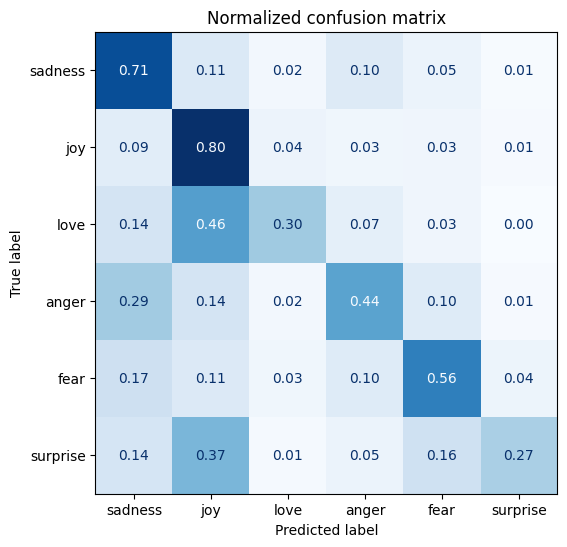

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

### 2.3. 

In [52]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels)).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    return {"f1": f1, "accuracy": accuracy }

In [54]:

from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                #   evaluation_strategy="epoch",
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")

In [55]:

from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

  0%|          | 0/500 [00:00<?, ?it/s]

{'loss': 0.8922, 'grad_norm': 5.285544395446777, 'learning_rate': 1e-05, 'epoch': 1.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.34321048855781555, 'eval_f1': 0.8973207039074207, 'eval_accuracy': 0.8995, 'eval_runtime': 11.2296, 'eval_samples_per_second': 178.101, 'eval_steps_per_second': 2.85, 'epoch': 1.0}
{'loss': 0.2746, 'grad_norm': 5.040464878082275, 'learning_rate': 0.0, 'epoch': 2.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.2365642637014389, 'eval_f1': 0.9200851714570497, 'eval_accuracy': 0.9205, 'eval_runtime': 11.7731, 'eval_samples_per_second': 169.878, 'eval_steps_per_second': 2.718, 'epoch': 2.0}
{'train_runtime': 716.2545, 'train_samples_per_second': 44.677, 'train_steps_per_second': 0.698, 'train_loss': 0.5834253845214844, 'epoch': 2.0}


In [56]:
preds_output = trainer.predict(emotions_encoded["validation"])

  0%|          | 0/32 [00:00<?, ?it/s]

In [57]:
preds_output.metrics

{'test_loss': 0.2365642637014389,
 'test_f1': 0.9200851714570497,
 'test_accuracy': 0.9205,
 'test_runtime': 11.009,
 'test_samples_per_second': 181.67,
 'test_steps_per_second': 2.907}

In [58]:
y_preds = np.argmax(preds_output.predictions, axis=1)

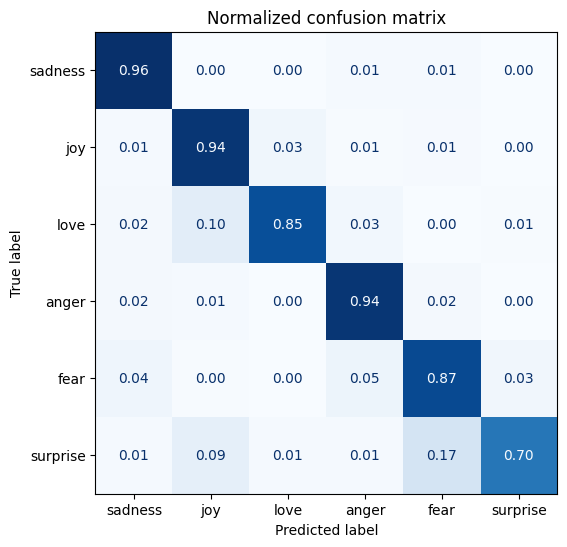

In [59]:
plot_confusion_matrix(y_preds, y_valid, labels)